# CS M148 Project 2 - Binary Classification Methods

For this project we're going to attempt a binary classification of a dataset using multiple methods and compare results. 

Our goals for this project will be to introduce you to several of the most common classification techniques, how to perform them and tweek parameters to optimize outcomes, how to produce and interpret results, and compare performance. You will be asked to analyze your findings and provide explanations for observed performance. 

Specifically you will be asked to classify whether a **patient is suffering from heart disease** based on a host of potential medical factors.

**DEFINITIONS**

**Binary Classification:** In this case a complex dataset has an added 'target' label with one of two options. Your learning algorithm will try to assign one of these labels to the data.

**Supervised Learning:** This data is fully supervised, which means it's been fully labeled and we can trust the veracity of the labeling.

## Background: The Dataset 

For this exercise we will be using a subset of the UCI Heart Disease dataset, leveraging the fourteen most commonly used attributes. All identifying information about the patient has been scrubbed. 

The dataset includes 14 columns. The information provided by each column is as follows:
- **age:** Age in years
- **sex:** (1 = male; 0 = female)
- **cp:** Chest pain type (0 = asymptomatic; 1 = atypical angina; 2 = non-anginal pain; 3 = typical angina)
- **trestbps:** Resting blood pressure (in mm Hg on admission to the hospital)
- **cholserum:** Cholestoral in mg/dl
- **fbs** Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
- **restecg:** Resting electrocardiographic results (0= showing probable or definite left ventricular hypertrophy by Estes' criteria; 1 = normal; 2 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV))
- **thalach:** Maximum heart rate achieved
- **exang:** Exercise induced angina (1 = yes; 0 = no)
- **oldpeakST:** Depression induced by exercise relative to rest
- **slope:** The slope of the peak exercise ST segment (0 = downsloping; 1 = flat; 2 = upsloping)
- **ca:** Number of major vessels (0-4) colored by flourosopy
- **thal:** 1 = normal; 2 = fixed defect; 3 = reversable defect
- **sick:** Indicates the presence of Heart disease (True = Disease; False = No disease)

`sick` is the label that you will be predicting.

## Loading Essentials and Helper Functions 

In [37]:
# Here are a set of libraries we imported to complete this assignment. 
# Feel free to use these or equivalent libraries for your implementation
# If you can run this cell without any errors, you're ready to go.
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 

import seaborn as sns # used for plot interactive graph.
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import metrics
from sklearn.svm import SVC  
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import sklearn.metrics.cluster as smc
from matplotlib import pyplot

import os
import itertools
import random 

%matplotlib inline

random.seed(148) 

In [38]:
# Helper function allowing you to export a graph
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [39]:
# Helper function that allows you to draw nicely formatted confusion matrices
def draw_confusion_matrix(y, yhat, classes):
    '''
        Draws a confusion matrix for the given target and predictions
        Adapted from scikit-learn example.
    '''
    plt.cla()
    plt.clf()
    matrix = confusion_matrix(y, yhat)
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    num_classes = len(classes)
    plt.xticks(np.arange(num_classes), classes)
    plt.yticks(np.arange(num_classes), classes)
    
    fmt = 'd'
    thresh = matrix.max() / 2.
    for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
        plt.text(j, i, format(matrix[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if matrix[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

## Part 1. Load the Data and Analyze

Let's load our dataset so we can work with it (correct the path if your notebook is in a different directory than the .csv file).

In [40]:
data = pd.read_csv('heartdisease.csv')
data = data.sample(random_state=42, frac=1).reset_index(drop=True)

### Question 1.1 

Now that our data is loaded, let's take a closer look at the dataset we're working with. Use the head method, the describe method, and the info method to display some of the rows so we can visualize the types of data fields we'll be working with.

In [41]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,sick
0,57,1,0,150,276,0,0,112,1,0.6,1,1,1,True
1,59,1,3,170,288,0,0,159,0,0.2,1,0,3,True
2,57,1,2,150,126,1,1,173,0,0.2,2,1,3,False
3,56,0,0,134,409,0,0,150,1,1.9,1,2,3,True
4,71,0,2,110,265,1,0,130,0,0.0,2,1,2,False


In [42]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  sick      303 non-null    bool   
dtypes: bool(1), float64(1), int64(12)
memory usage: 31.2 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


### Question 1.2
Sometimes data will be stored in different formats (e.g., string, date, boolean), but many learning methods work strictly on numeric inputs. Call the info method to determine the datafield type for each column. Are there any that are problemmatic and why?

[Use this area to describe any fields you believe will be problemmatic and why] E.g., All the columns in our dataframe are numeric (either int or float), however our target variable 'sick' is a boolean and may need to be modified.

In [43]:
data.info()   # There is one bool column (the rest are ints and floats)
              # Only the 'sick' column will be problematic so far, since it is not an int or float;
              #    instead, it is a bool, but it should be easy to change it to an int (a 0, if healthy, or 1, if sick)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  sick      303 non-null    bool   
dtypes: bool(1), float64(1), int64(12)
memory usage: 31.2 KB


### Question 1.3
Determine if we're dealing with any null values. If so, report which columns.

In [44]:
data.isnull().sum()   # As we see, there are no null values (none are problematic)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
sick        0
dtype: int64

### Question 1.4
Before we begin our analysis we need to fix the field(s) that will be problematic. Specifically convert our boolean `sick` variable into a binary numeric target variable (values of either '0' or '1'), and then drop the original `sick` datafield from the dataframe.

In [45]:
data['sick'] = data['sick'].astype(int)
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,sick
0,57,1,0,150,276,0,0,112,1,0.6,1,1,1,1
1,59,1,3,170,288,0,0,159,0,0.2,1,0,3,1
2,57,1,2,150,126,1,1,173,0,0.2,2,1,3,0
3,56,0,0,134,409,0,0,150,1,1.9,1,2,3,1
4,71,0,2,110,265,1,0,130,0,0.0,2,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,50,1,2,140,233,0,1,163,0,0.6,1,1,3,1
299,51,1,2,94,227,0,1,154,1,0.0,2,1,3,0
300,69,1,3,160,234,1,0,131,0,0.1,1,1,2,0
301,46,1,0,120,249,0,0,144,0,0.8,2,0,3,1


### Question 1.5
Now that we have a feel for the data-types for each of the variables, plot histograms of each field and attempt to get a feel of how each variable performs (for example, is it a binary, or limited selection, or does it follow a gradient)? 

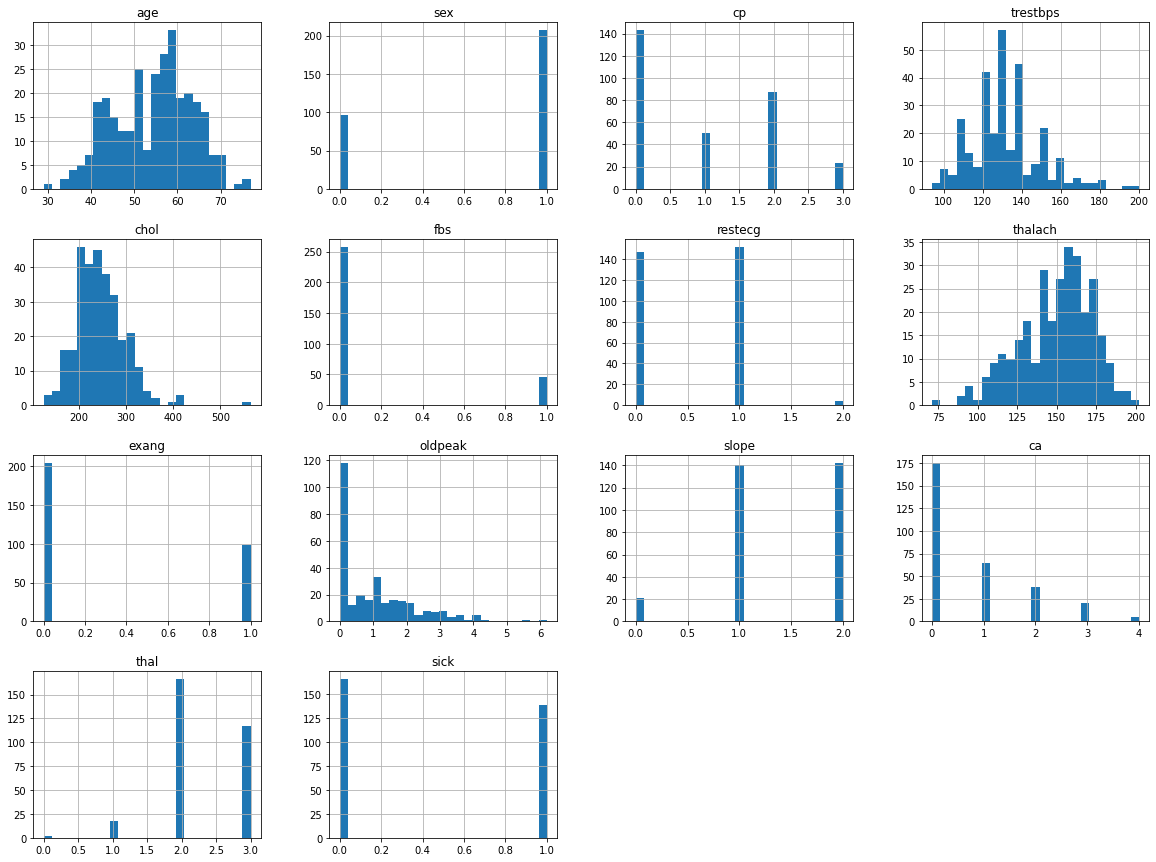

In [46]:
data.hist(figsize=(20,15), bins=25)
plt.show()

### Question 1.6
We also want to make sure we are dealing with a balanced dataset. In this case, we want to confirm whether or not we have an equitable number of  sick and healthy individuals to ensure that our classifier will have a sufficiently balanced dataset to adequately classify the two. Plot a histogram specifically of the sick target, and conduct a count of the number of sick and healthy individuals and report on the results.

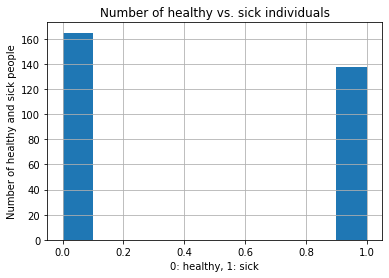

0    165
1    138
Name: sick, dtype: int64

In [47]:
data["sick"].hist()
plt.title("Number of healthy vs. sick individuals")
plt.xlabel("0: healthy, 1: sick")
plt.ylabel("Number of healthy and sick people")
plt.show()
data["sick"].value_counts()

[Include description of findings here] E.g., As we can see, our sample contains xxx healthy individuals and yyy sick individuals, which reflects a [your conclusion here].

From obtaining the value counts of the 'sick' column, we see that our sample contains 165 healthy individuals 
and 138 sick individuals which reflects that we have a somewhat equitable number of healthy and sick individuals
to ensure that we can adequately classify the two. The ratio between healthy and sick is 165:138, which is about a 
1.2:1 ratio. The dataset is balanced.

### Question 1.7 
Balanced datasets are important to ensure that classifiers train adequately and don't overfit, however arbitrary balancing of a dataset might introduce its own issues. Discuss some of the problems that might arise by artificially balancing a dataset.

[You answer here] E.g., artificially inflating numbers to balance a dataset may result in xxx. Concurrently showing statistically uncommon events as likely may result in yyy.

ANSWER: 
Balancing datasets leads to problems with bias; if the sample we want to downsample or inflate has problems with bias or variance, then trying to balance this set will magnify these problems with bias and variance.
Whether we artifically inflate or downsample, the number of healthy or sick people will be biased since this does not represent the sample; there were factors behind why one of the classes has a very small amount of data, and we just erased this reason.
There is a reason why the data is not balanced in the first place, and artificially inflating or downsampling datasets both erases real data and the reasons behind the data.

### Question 1.8
Now that we have our dataframe prepared let's start analyzing our data. For this next question let's look at the correlations of our variables to our target value. First, map out the correlations between the values, and then discuss the relationships you observe. Do some research on the variables to understand why they may relate to the observed corellations (get some domain knowledge). Intuitively, why do you think some variables correlate more highly than others? Also discuss some pairs of variables that have very little correlation and why this might be the case for them.

Hint: one possible approach you can use the `sns.heatmap()` function to map the corr() method. Note: if your heatmap is not entirely visible, [this link](https://github.com/mwaskom/seaborn/issues/1773#issuecomment-546466986) may be helpful in solving the issue.

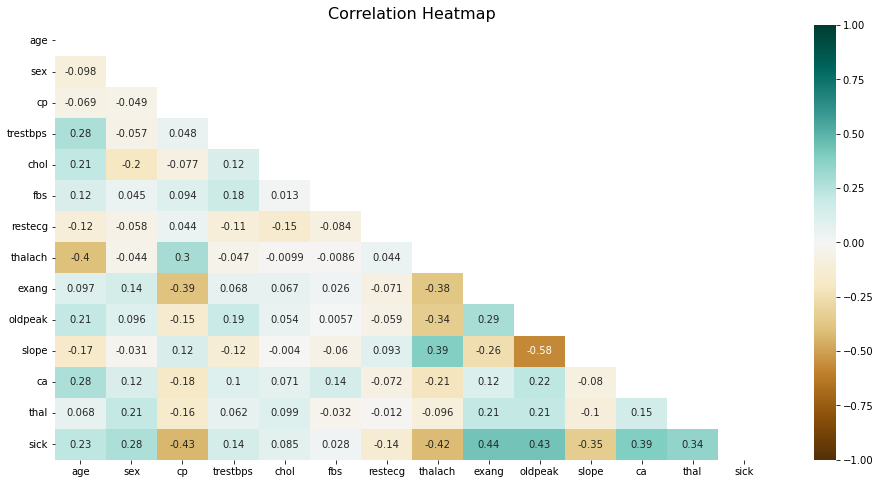

In [48]:
plt.figure(figsize=(16,8))
corr_matrix = data.corr()
heatmap = sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1,cmap='BrBG',
                     mask=np.triu(np.ones_like(corr_matrix, dtype=bool)))
heatmap.set_title("Correlation Heatmap", fontsize=16)
plt.show()

[Discuss correlations here] E.g., We find the the strongest direct correlation between the presence of exercise induced angina (also a binary), and depression induced by exercise relative to rest indicates a strong direct correlation. Both of these are understandable as heart failure under conditions of duress is a clear indication of heart disease. Conversely, maximum heart rate achieved is inversely correlated, likely as a healthy heart is unable to achieve a high heart rate.

DISCUSSION: The strongest correlation is a negative correlation between slope and oldpeak, which has correlation coefficient -0.58. This is because as the slope of the peak exercise increases (to upsloping), the depression induced by exercise relative to rest decreases (more exericise is related with people being happier exercising). Sick and cp (chest pain) are negatively correlated as well because when people have heart disease, they are more likely to not have chest pain (be asymptotic, value 0), as opposed to having chest pain (angina, non-anginal pain). Sick and thalach are also negatively correlated; if people are sick, the maximum heart rate achieved is lower, as a unhealhty heart cannot beat as fast.

Positive correlations include ones between having heart disease and exang and oldpeak, meaning that having heart disease goes along with having exercise-induced engina and depression induced by exercise relative to rest. Slope and thalach are also positively correlated: people that exercise more have a higher upslope and a higher maximum heart rate (heart is healthier).

## Part 2. Prepare the Data

Before running our various learning methods, we need to do some additional prep to finalize our data. Specifically you'll have to cut the classification target from the data that will be used to classify, and then you'll have to divide the dataset into training and testing cohorts.

We're going to ask you to prepare 2 batches of data:
1. Raw numeric data that hasn't gone through any additional pre-processing.
2. Data that you pipeline using your own selected methods. We will then feed both of these datasets into a classifier to showcase just how important this step can be!

### Question 2.1
Save the target column as a separate array and then drop it from the dataframe. 

In [49]:
heart_y = data['sick'].copy()
heart_X = data.drop('sick', axis=1)

### Question 2.2
Create your 'Raw' unprocessed training data by dividing your dataframe into training and testing cohorts, with your training cohort consisting of 85% of your total dataframe (hint: use the `train_test_split` method). Output the resulting shapes of your training and testing samples to confirm that your split was successful.

In [50]:
X_train, X_test, y_train, y_test = train_test_split(heart_X, heart_y,
                                                    test_size=0.15, random_state=42)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (257, 13)
y_train shape: (257,)
X_test shape: (46, 13)
y_test shape: (46,)


### Question 2.3
In lecture we learned about K-Nearest Neighbor. One thing we noted was because KNN relies on Euclidean distance, they are highly sensitive to the relative magnitude of different features. Let's see that in action! Implement a KNN algorithm on our data (use `scikit-learn`) and report the results. For this initial implementation simply use the default settings. Report on the accuracy of the resulting model.

In [51]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

preds_test = knn.predict(X_test)
preds_test

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0])

In [52]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import roc_auc_score, roc_curve

print("%-12s %f" % ('Accuracy:', accuracy_score(y_test, preds_test)))

Accuracy:    0.673913


### Question 2.4 
Now implement a pipeline of your choice to transform the data. You can opt to handle null values and categoricals however you wish, however please scale your numeric features using standard scaler. Refer to Project 1 for a example pipeline that you can mimic.

In [53]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# age: Age in years
# sex: (1 = male; 0 = female)
# cp: Chest pain type (0 = asymptomatic; 1 = atypical angina; 2 = non-anginal pain; 3 = typical angina)
# trestbps: Resting blood pressure (in mm Hg on admission to the hospital)
# cholserum: Cholestoral in mg/dl
# fbs Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
# restecg: Resting electrocardiographic results (0= showing probable or definite left 
#    ventricular hypertrophy by Estes' criteria; 1 = normal; 2 = having ST-T wave abnormality
#    (T wave inversions and/or ST elevation or depression of > 0.05 mV))
# thalach: Maximum heart rate achieved
# exang: Exercise induced angina (1 = yes; 0 = no)
# oldpeakST: Depression induced by exercise relative to rest
# slope: The slope of the peak exercise ST segment (0 = downsloping; 1 = flat; 2 = upsloping)
# ca: Number of major vessels (0-4) colored by flourosopy
# thal: 1 = normal; 2 = fixed defect; 3 = reversable defect

# binary variables: sex, fbs, exang (shouldn't be one-hot encoded since it is redundant)
# cateogrical variables to one hot encode are cp, restecg, slope, thal

heart_num = heart_X.drop(["cp", "restecg", "slope", "thal"], axis=1)
numerical_features = list(heart_num)
categorical_features = ["cp", "restecg", "slope", "thal"]

full_pipeline = ColumnTransformer([
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(categories='auto'), categorical_features),
    ])

# the column thal has a few 0 values, but this should not be the case
heart_X_pipeline_has_thal_0 = full_pipeline.fit_transform(heart_X)   # this does not have the sick column
heart_X_pipeline_has_thal_0

array([[ 0.29046364,  0.68100522,  1.04952029, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.5110413 ,  0.68100522,  2.19177836, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.29046364,  0.68100522,  1.04952029, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.61392956,  0.68100522,  1.62064933, ...,  0.        ,
         1.        ,  0.        ],
       [-0.92271345,  0.68100522, -0.66386682, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.9521966 , -1.46841752,  0.47839125, ...,  0.        ,
         1.        ,  0.        ]])

In [54]:
print(heart_X_pipeline_has_thal_0[0])
print(len(heart_X_pipeline_has_thal_0[0]))

[ 0.29046364  0.68100522  1.04952029  0.57466203 -0.41763453 -1.6463164
  1.43548113 -0.37924438  0.26508221  1.          0.          0.
  0.          1.          0.          0.          0.          1.
  0.          0.          1.          0.          0.        ]
23


In [55]:
heart_X_pipeline = np.delete(heart_X_pipeline_has_thal_0, 19, axis=1)
# this column has the values where thal = 0 (shouldn't be there)
# thal is the last categorical value so its columns are 19-22 so thal = 0 is column 19

### Question 2.5
Now split your pipelined data into an 85/15 split and run the same KNN as you did previously. Report its accuracy, and discuss the implications of the different results you are obtaining.

In [56]:
X_pipeline_train, X_pipeline_test, y_pipeline_train, y_pipeline_test = train_test_split(
                                                     heart_X_pipeline, 
                                                     heart_y, test_size=0.15,
                                                     random_state=42)
print("X_train shape:", X_pipeline_train.shape)
print("y_train shape:", y_pipeline_train.shape)
print("X_test shape:", X_pipeline_test.shape)
print("y_test shape:", y_pipeline_test.shape)

X_train shape: (257, 22)
y_train shape: (257,)
X_test shape: (46, 22)
y_test shape: (46,)


In [57]:
knn_pipeline = KNeighborsClassifier()
knn_pipeline.fit(X_pipeline_train, y_pipeline_train)

preds_test_knn = knn_pipeline.predict(X_pipeline_test)
preds_test_knn

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1])

In [58]:
print("%-12s %f" % ('Accuracy:', accuracy_score(y_pipeline_test, preds_test_knn)))

Accuracy:    0.804348


The results and accuracy are much better because we use the pipeline which uses a Standard Scaler on the numerical values and one hot encodes the categorical variables (excluding the binary variables becuase it would be redundant). The data has 22 columns instead of only 13 because we one hot encoded 4 categorical variables, which increased the number of columns by 9.

### Question 2.6 Hyperparameter Optimization
As we saw in lecture, the KNN Algorithm includes an `n_neighbors` attribute that specifies how many neighbors to use when developing the cluster. (The default value is 5, which is what your previous model used.) Lets now letting `n` take on the values 1, 2, 3, 5, 7, 9, 10, 20, 50, 75, and 100. Run your model for each value and report the accuracy for each. Then, create a plot of accuracy versus `n_neighbors` and discuss how and why the accuracy changes as `n_neighbors` changes.

HINT: leverage Python's ability to loop to run through the array and generate results so that you don't need to manually code each iteration.

n = 1 accuracy: 0.7391304347826086
n = 2 accuracy: 0.7608695652173914
n = 3 accuracy: 0.8043478260869565
n = 5 accuracy: 0.8043478260869565
n = 7 accuracy: 0.8260869565217391
n = 9 accuracy: 0.8043478260869565
n = 10 accuracy: 0.8260869565217391
n = 20 accuracy: 0.8043478260869565
n = 50 accuracy: 0.8478260869565217
n = 75 accuracy: 0.8695652173913043
n = 100 accuracy: 0.8043478260869565


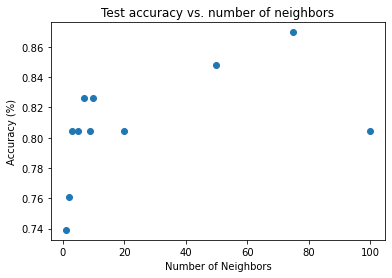

In [59]:
numbers = [1, 2, 3, 5, 7, 9, 10, 20, 50, 75, 100]
acc_list = []
for n in numbers:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn_classifier = knn.fit(X_pipeline_train, y_pipeline_train)
    preds_test_knn = knn_classifier.predict(X_pipeline_test)
    acc = accuracy_score(y_pipeline_test, preds_test_knn)
    acc_list.append(acc)
    print("n = %d accuracy:" %n, acc)

plt.scatter(numbers, acc_list)
plt.title("Test accuracy vs. number of neighbors")
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy (%)")
plt.show()

From the plot, the values of n with highest accuracy are 50 and 75. This is because classifying with more closest neighbors makes the decision on where to classify the value easier since we should put data points with similar values with their closest neighbors. If we decide on less closest neighbors, then these values might not be completely similar since we are only checking a very limited amount of neighbors, and we may exclude other close neighbors. This would be overfitting since it gives us a non-smooth decision surface. n = 100 (and other high n values) does not have a high accuracy because if there are too many closest neighbors to classify with, then it is underfitting and the decision surface gets too smooth and all the data points are placed in classes that are too large and not that similar.

## Part 3. Additional Learning Methods
So we have a model that seems to work well. But let's see if we can do better! To do so we'll employ multiple learning methods and compare results. Throughout this part, use the data that was produced by your pipeline earlier.

### Linear Decision Boundary Methods
We'll spend some time exploring logistic regression and SVM methods.

### Question 3.1 Logistic Regression
Let's now try a classifier, we introduced in lecture, one that's well known for handling linear models: logistic regression. Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable.  Implement a logistic regression classifier on your data with the default settings. Report accuracy, precision, recall, and F1 score and plot a confusion matrix.

In [60]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_pipeline_train, y_pipeline_train)

preds_test_log = logreg.predict(X_pipeline_test)
preds_test_prob_log = logreg.predict_proba(X_pipeline_test)

Accuracy:    0.869565
Precision:   0.952381
Recall:      0.800000
F1:          0.869565


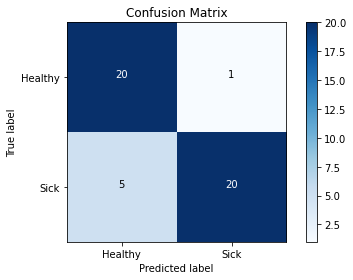

In [61]:
print("%-12s %f" % ('Accuracy:', accuracy_score(y_pipeline_test, preds_test_log)))
print("%-12s %f" % ('Precision:', precision_score(y_pipeline_test, preds_test_log)))
print("%-12s %f" % ('Recall:', recall_score(y_pipeline_test, preds_test_log)))
print("%-12s %f" % ('F1:', f1_score(y_pipeline_test, preds_test_log)))
draw_confusion_matrix(y_pipeline_test, preds_test_log, ['Healthy', 'Sick'])

### Question 3.2
Discuss what each measure (accuracy, precision, recall, and F1 score) is reporting, why they are different, and why are each of these measures is significant. Explore why we might choose to evaluate the performance of differing models differently based on these factors. Try to give some specific examples of scenarios in which you might value one of these measures over the others.


Firstly, for this specific data set, it is way worse to predict someone to be healthy when they are actually sick (worst case: someone thinks they are healthy when they are actually sick and they die) than it is to predict someone to be sick when they are actually healthy (worst case: the patient just needs to go to the hospital again to get a second opinion). So, we want to keep false negatives as low as possible (want a really high recall score if possible). It is cool if precision is really high, but this just means that the number of false positives is low, which is not as important as getting the number of false negatives really low.

Accuracy is the fraction of predictions the model gets right (number of correct predictions / total number of predictions). Obviously, we want this value to be high for all models, especially when we care more about true positives and true negatives.

Precision is the fraction of true positives over the total number of positive predictions (true positives / true + false positvies); it looks at what proportion of positive predictions were actually correct. A higher precision score means a lower rate of false positives, which is important for models that don't care about false negatives. An example of such model is an email system, where we want to lower the number of times we send an important email to a spam folder (false positive) but we don't really care if we have a somewhat high number of false negatives (sending spam mail to the inbox).

Recall is the fraction of true positive observations over all positive observations (true positives / true positives + false negatives). We value recall most for models like the one we are using, since we want to decrease false negatives (predicting someone is healthy when they are actually sick).

F1 is the weighted average of precision and recall and considers both false positives and false negatives. It is the best score to look at if we want generally high performance minimizing both error types, so we would value this measure over the others if we just want to minimize both false negatives and false positives.


### Question 3.3
Graph the ROC curve of the logistic regression model.

AUC: 0.9295238095238095


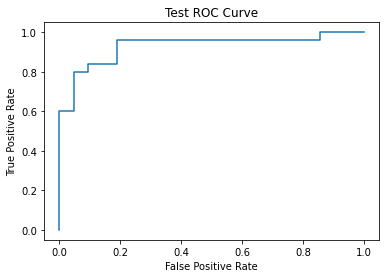

In [62]:
plt.figure()
fpr, tpr, thresholds = roc_curve(y_pipeline_test, preds_test_prob_log[:, 1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test ROC Curve')

print("AUC:", roc_auc_score(y_pipeline_test, preds_test_prob_log[:, 1]))

### Question 3.4
Describe what an ROC curve is and what your ROC graph output is showing.

An ROC curve is a graph created by plotting the true positive rate against the false positive rate at different classification thresholds. For the above ROC curve, the auc is high (close to 1), so the test is very useful and it has a good measure of separability between true positives and true negatives (means there is a small number of false positives and false negatives).

### Question 3.5
Let's tweak a few settings. Set your solver to `newton-cg`, your `max_iter=4`, and `penalty='none'`, and rerun your model. Report out the same metrics (the 4 + confusion matrix) as before. How do your results change?

In [63]:
logreg_newton = LogisticRegression(solver='newton-cg', max_iter=4, penalty='none')
logreg_newton.fit(X_pipeline_train, y_pipeline_train)

preds_test_log_n = logreg_newton.predict(X_pipeline_test)
preds_test_prob_log_n = logreg_newton.predict_proba(X_pipeline_test)

C:\Users\15626\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


Accuracy:    0.847826
Precision:   0.909091
Recall:      0.800000
F1:          0.851064


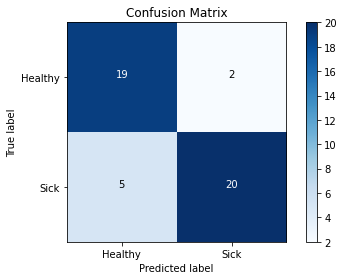

In [64]:
print("%-12s %f" % ('Accuracy:', accuracy_score(y_pipeline_test, preds_test_log_n)))
print("%-12s %f" % ('Precision:', precision_score(y_pipeline_test, preds_test_log_n)))
print("%-12s %f" % ('Recall:', recall_score(y_pipeline_test, preds_test_log_n)))
print("%-12s %f" % ('F1:', f1_score(y_pipeline_test, preds_test_log_n)))
draw_confusion_matrix(y_pipeline_test, preds_test_log_n, ['Healthy', 'Sick'])

### Question 3.6
Did you notice that when you ran the previous model you got the following warning: `ConvergenceWarning: The max_iter was reached which means the coef_ did not converge.` Check the documentation and see if you can implement a fix for this problem, and again report your results.

Note: if you did not get a warning, which might happen to those running this notebook in VSCode, please try running the following code, as described [here](https://github.com/microsoft/vscode-jupyter/issues/1312):
```
import warnings
warnings.simplefilter(action="default")
```

Accuracy:    0.826087
Precision:   0.904762
Recall:      0.760000
F1:          0.826087


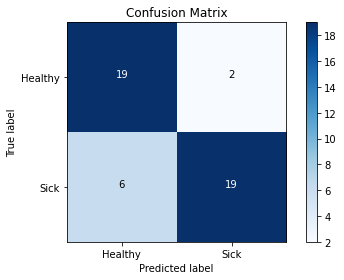

In [65]:
logreg_newton = LogisticRegression(solver='newton-cg', max_iter=100000, penalty='none')
logreg_newton.fit(X_pipeline_train, y_pipeline_train)

preds_test_log_n = logreg_newton.predict(X_pipeline_test)
preds_test_prob_log_n = logreg_newton.predict_proba(X_pipeline_test)

print("%-12s %f" % ('Accuracy:', accuracy_score(y_pipeline_test, preds_test_log_n)))
print("%-12s %f" % ('Precision:', precision_score(y_pipeline_test, preds_test_log_n)))
print("%-12s %f" % ('Recall:', recall_score(y_pipeline_test, preds_test_log_n)))
print("%-12s %f" % ('F1:', f1_score(y_pipeline_test, preds_test_log_n)))
draw_confusion_matrix(y_pipeline_test, preds_test_log_n, ['Healthy', 'Sick'])

### Question 3.7
Explain what you changed and why this fixed the `ConvergenceWarning` problem. Are there any downsides of your fix? How might you have harmed the outcome instead? What other parameters you set may be playing a factor in affecting the results?

I increased the max_iter to 100000, since only iterating 4 items led to the optimization process being unable to converge. 
However, now the outcome is worse (with lower scores across the board). This is because setting the max iterations to a higher number is a band-aid fix for a bigger problem; if the optimization process does not converge for a small number of iterations, it is due to other problems like un-normalized training data, inappropriate regularization weights, strong correlations in the features, etc.; increasing the max iterations to force the optimization process to converge is a bad solution opposed to fixing the above problems. 

Another parameter that can be affecting the results is setting the penalty to `none`; we are not doing Lasso or Ridge regularization. Since there is no penalty, some variables with large impact on the data lead to an overfitting model; Ridge regression reduces the impact any one feature has on the model. Additionally, if there are a lot of variables, this can increase the complexity of the model as it keeps all variables with even the smallest contributions (lasso "zeroes out" some coefficients, reducing the model complexity).

### Question 3.8
Rerun your logistic classifier, but modify the `penalty='l1'`, `solver='liblinear'` and again report the results.


Accuracy:    0.869565
Precision:   0.952381
Recall:      0.800000
F1:          0.869565


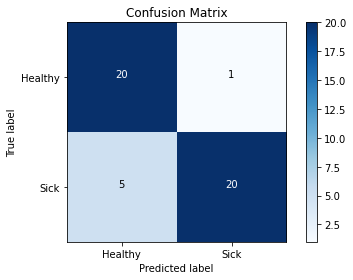

In [66]:
logreg_liblinear = LogisticRegression(solver='liblinear', max_iter=100000, penalty='l1') # lasso regression
logreg_liblinear.fit(X_pipeline_train, y_pipeline_train)

preds_test_log_l = logreg_liblinear.predict(X_pipeline_test)
preds_test_prob_log_l = logreg_liblinear.predict_proba(X_pipeline_test)

print("%-12s %f" % ('Accuracy:', accuracy_score(y_pipeline_test, preds_test_log_l)))
print("%-12s %f" % ('Precision:', precision_score(y_pipeline_test, preds_test_log_l)))
print("%-12s %f" % ('Recall:', recall_score(y_pipeline_test, preds_test_log_l)))
print("%-12s %f" % ('F1:', f1_score(y_pipeline_test, preds_test_log_l)))
draw_confusion_matrix(y_pipeline_test, preds_test_log_l, ['Healthy', 'Sick'])

### Question 3.9
Explain what what the two solver approaches are, and why the model with `liblinear` and `l1` penalty likely produced the optimal outcome.

The model with `liblinear` and `l1` penalty produced the optimal outcome (same outcome as LogisticRegression with default parameters) compared to the model with `newton-cg` and penalty `none`.

Firstly, `liblinear` is a linear classification that supports logistic regression and linear support vector machines, while `newton-cg` is a classification using quadratic function minimization. `liblinear` uses a one-vs-rest fashion for the optimization problem, which trains separate binary classifiers for all classes. `newton-cg` cannot use the `l1` parameter for the penalty. 

Secondly, including a penalty, specifically, a lasso regression term, as opposed to having no penalty reduces the complexity of the model by shrinking the less important features' coefficients to zero, thus removing some features altogether; this way, the model is not under effects of overfitting; the model that uses solver `newton-cg` might be under the effects of overfitting.

### Question 3.10
We also played around with different penalty terms (none, L1 etc.) Describe what the purpose of a penalty term is and the difference between L1 and L2 penalties.

No penalty: we are not doing Lasso or Ridge regression. Since there is no penalty, variables with large coefficients can have a large effect on the data (Ridge regression reduces the impact any one feature has on the model) and if there are a lot of variables, this can increase the complexity of the model as it keeps all variables with even the smallest contributions (lasso "zeroes out" some coefficients, reducing the model complexity). The purpose of the penalty is to reduce the impact any one feature can have on the model and/or to reduce the complexity of the model by zeroeing out some variable coefficients that have very minor contributions. Without having a penalty, the model is subject to overfitting.

L1 penalty: Lasso regression penalizes the optimization function by looking at the magnitudes of the variables' coefficients and shrinks the less important features' coefficients to zero; thus, lasso regression removes some features altogether. This reduces the complexity of the model by keeping only the most significant features (since the least important features will be zeroed out). Normally, we like to use Lasso regression, as it supresses extreme parameter values and completely neglects insignificant features for the evaluation. 

L2 penalty: Ridge regression looks at the squares of the coefficients of the variables and shrinks the coefficients so variables that have a large impact on the data have their impact reduced, close to zero for some. However, all the variables are incorporated in the model.





### Question 3.11 Support Vector Machine (SVM)

A support vector machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples. In 2-D space this hyperplane is a line dividing a plane in two parts where in each class lay in either side.

Implement an SVM classifier on your pipelined data (recommend using `scikit-learn`) For this implementation you can simply use the default settings, but set `probability=True`.

In [67]:
svm_classifier = SVC(probability=True)
svm_classifier.fit(X_pipeline_train, y_pipeline_train)
preds_test_svm = svm_classifier.predict(X_pipeline_test)

### Question 3.12 
Report the accuracy, precision, recall, F1 Score, and confusion matrix of the resulting model.

Accuracy:    0.804348
Precision:   0.833333
Recall:      0.800000
F1:          0.816327


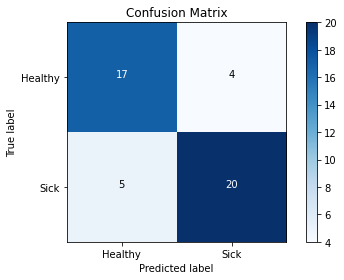

In [68]:
print("%-12s %f" % ('Accuracy:', accuracy_score(y_pipeline_test, preds_test_svm)))
print("%-12s %f" % ('Precision:', precision_score(y_pipeline_test, preds_test_svm)))
print("%-12s %f" % ('Recall:', recall_score(y_pipeline_test, preds_test_svm)))
print("%-12s %f" % ('F1:', f1_score(y_pipeline_test, preds_test_svm)))
draw_confusion_matrix(y_pipeline_test, preds_test_svm, ['Healthy', 'Sick'])

### Question 3.13
Rerun your SVM, but now modify your model parameter kernel to be `linear`. Again report your accuracy, precision, recall, F1 scores, and confusion matrix and plot the new ROC curve.  

Accuracy:    0.869565
Precision:   0.952381
Recall:      0.800000
F1:          0.869565


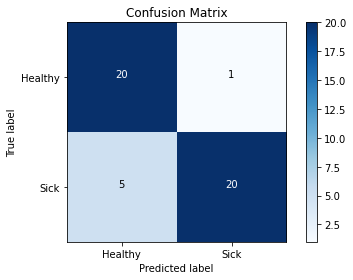

In [69]:
svm_classifier = SVC(probability=True, kernel='linear')
svm_classifier.fit(X_pipeline_train, y_pipeline_train)

preds_test_svm = svm_classifier.predict(X_pipeline_test)
preds_test_prob_svm = svm_classifier.predict_proba(X_pipeline_test)

print("%-12s %f" % ('Accuracy:', accuracy_score(y_pipeline_test, preds_test_svm)))
print("%-12s %f" % ('Precision:', precision_score(y_pipeline_test, preds_test_svm)))
print("%-12s %f" % ('Recall:', recall_score(y_pipeline_test, preds_test_svm)))
print("%-12s %f" % ('F1:', f1_score(y_pipeline_test, preds_test_svm)))
draw_confusion_matrix(y_pipeline_test, preds_test_svm, ['Healthy', 'Sick'])

Test auc: 0.9257142857142856


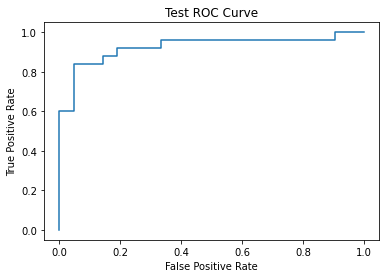

In [70]:
plt.figure()
fpr, tpr, thresholds = roc_curve(y_pipeline_test, preds_test_prob_svm[:, 1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test ROC Curve')

print("Test auc:", roc_auc_score(y_pipeline_test, preds_test_prob_svm[:, 1]))

### Question 3.14
Explain the what the new results you've achieved mean. Read the documentation to understand what you've changed about your model and explain why changing that input parameter might impact the results in the manner you've observed.

The results are the same as for default LogisticRegression and LogisticRegression with `liblinear` solver, meaning that these are the best three models for accuracy, precision, recall, and F1 (so best models overall).

As for the Support Vector Machine classifier, we changed the kernel to be `linear`, and this led to better results than the default SVM classifier, which uses default kernel `rbf` (radial basis function) which is optimal for non-linear problems, while kernel `linear` is optimal for linear problems. In this case, the default SVC that uses kernel `rbf` overfits the model, so the algorithm cannot be generalized.

### Question 3.15
Both logistic regression and linear SVM are trying to classify data points using a linear decision boundary. How do they differ in how they try to find this boundary?


They differ in finding the linear decision boundary because logistic regression uses the sigmoid function to find the relationship between variables while SVM creates a hyperplane decision boundary which separates data into classes and achieves linear separation by mapping the data to a higher dimensional space (kernel function).

SVM tries to maximize the margin (distance between the hyperplane and the support vectors) that separates the classes; it is based on geometric properties of the data. Logistic regression on the other hand is based on statistical properties of the data; it is a generalized linear regression approach that regresses for the probability of a categorical outcome (not a continuous y).

### Question 3.16
We also learned about linear regression in class. Why is linear regression not a suitable model for this classification task?

We cannot use linear regression for this classification task because it is a binary classification task of a categorical variable. Linear regression works well when y is a continuous variable, but when y is a categorical binary variable (either 0 or 1), linear regression is unable to classify each observation into a category; it just tries to make a line. This means that it would try to classify observations on a line between 0 and 1 (and it would also have nonsensical values above 1 or below 0) instead of classifying observations as either a 0 or 1, so some data points will be predicted to have a sick value of, say 0.5, which just does not make sense in the context of a categorical variable.

### Statistical Classification Methods
Now we'll explore a statistical classification method, the naive Bayes classifier.

Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes' theorem with the "naive" assumption of conditional independence between every pair of features given the value of the class variable. Bayes' theorem states the following relationship, given class variable $C_k$ and dependent feature vector $\bold{x} = [x_1, x_2, ..., x_n]^T$, $$P(C_k | \bold{x}) = \frac{P(C_k)P(\bold{x} | C_k)}{P(\bold{x})}$$

Note for our purposes, there are 2 possible classes (sick or not sick), so $k$ ranges from 1 to 2.

### Question 3.17
Implement a naive Bayes Classifier on the pipelined data. Use the `GaussianNB` model. For this model, simply use the default parameters. Report out the number of mislabeled points that result (i.e., both the false positives and false negatives), along with the accuracy, precision, recall, F1 Score and confusion matrix. Also, plot an ROC curve.

Accuracy:    0.673913
Precision:   0.916667
Recall:      0.440000
F1:          0.594595


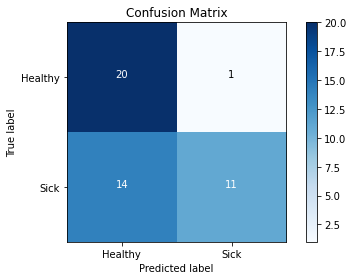

In [71]:
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()
gaussian.fit(X_pipeline_train, y_pipeline_train)

preds_test_gaussian = gaussian.predict(X_pipeline_test)
preds_test_prob_gaussian = gaussian.predict_proba(X_pipeline_test)

print("%-12s %f" % ('Accuracy:', accuracy_score(y_pipeline_test, preds_test_gaussian)))
print("%-12s %f" % ('Precision:', precision_score(y_pipeline_test, preds_test_gaussian)))
print("%-12s %f" % ('Recall:', recall_score(y_pipeline_test, preds_test_gaussian)))
print("%-12s %f" % ('F1:', f1_score(y_pipeline_test, preds_test_gaussian)))
draw_confusion_matrix(y_pipeline_test, preds_test_gaussian, ['Healthy', 'Sick'])

Test auc: 0.8628571428571429


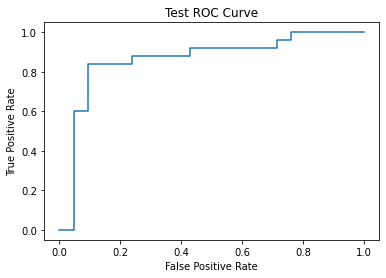

In [72]:
plt.figure()
fpr, tpr, thresholds = roc_curve(y_pipeline_test, preds_test_prob_gaussian[:, 1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test ROC Curve')

print("Test auc:", roc_auc_score(y_pipeline_test, preds_test_prob_gaussian[:, 1]))

### Question 3.18
Discuss the observed results. What assumptions about our data are we making here and why might those be inaccurate?

The results for the Gaussian Naive Bayes classifier are very bad, with recall being really low (a lot of false negatives - the model predicts people are healthy when they are actually sick).

We are making assumptions that our data follows a normal distribution and that our data features are continuous (this is inaccurate as a large amount of features in the dataset are categorical). Another assumption we make is that the features are independent from each other; we saw from the correlation matrix that some features are moderately correlated.

## Part 4: Cross Validation and Model Selection
You've sampled a number of different classification techniques, leveraging nearest neighbors, linear classifiers, and statistical classifiers. You've also tweaked with a few parameters for those models to optimize performance. Based on these experiments you should have settled on a particular model that performs most optimally on this dataset. Before our work is done though, we want to ensure that our results are not the result of the random sampling of our data we did with the train-test split. To check this, we will conduct a K-fold cross validation of our top 2 performing models, assess their cumulative performance across folds (report accuracy, precision, recall, and F1 score), and determine the best model for our particular data.

### Question 4.1
Select your top 2 performing models and run a 10-Fold cross validation on both. Report your best performing model.


In [73]:
from sklearn.model_selection import KFold
from sklearn import model_selection
from sklearn.model_selection import cross_validate

kfold = model_selection.KFold(n_splits=10, random_state=42, shuffle=True) 
scoring = {'acc': 'accuracy',
           'prec': 'precision_macro',
           'rec': 'recall_macro',
           'f1': 'f1_macro'}

clf = LogisticRegression(solver='liblinear', penalty='l1')
scores = cross_validate(clf, heart_X_pipeline, heart_y, scoring=scoring, cv=kfold)

print("Logrithmic Regression Accuracy: %.2f%%" % (scores['test_acc'].mean() * 100)) 
print("Logrithmic Regression Precision: %.2f%%" % (scores['test_prec'].mean() * 100)) 
print("Logrithmic Regression Recall: %.2f%%" % (scores['test_rec'].mean() * 100)) 
print("Logrithmic Regression F1: %.2f%%" % (scores['test_f1'].mean() * 100)) 

print()

clf = SVC(kernel='linear')
scores = cross_validate(clf, heart_X_pipeline, heart_y, scoring=scoring, cv=kfold)

print("SVM Regression Accuracy: %.2f%%" % (scores['test_acc'].mean()*100.0))
print("SVM Regression Precision: %.2f%%" % (scores['test_prec'].mean()*100.0))
print("SVM Regression Recall: %.2f%%" % (scores['test_rec'].mean()*100.0))
print("SVM Regression F1: %.2f%%" % (scores['test_f1'].mean()*100.0))

Logrithmic Regression Accuracy: 83.49%
Logrithmic Regression Precision: 83.15%
Logrithmic Regression Recall: 82.96%
Logrithmic Regression F1: 82.76%

SVM Regression Accuracy: 82.16%
SVM Regression Precision: 82.12%
SVM Regression Recall: 81.47%
SVM Regression F1: 81.25%


### Question 4.2
Discuss your results and why they differ slightly from what you got for the 2 models above.

The results are different from the results above because of the K-fold cross validation. Originally, we just split our data once using train_test_split, which puts our data at risk for balance and bias issues (it is up to chance whether or not we get good balanced, unbiased training and test sets). 

K-fold cross validation works as follows: 
We randomly shuffle the dataset and split the dataset into k (above, k = 10) groups. We take each unqiue group as a test set, take the remaining groups as a training set, fit the model on the training set and evaluate on the test set, and obtain the evaluation score and discard the model. We then get the cumulative results over the 10 groups.

This way, we eliminate any potential balance and bias issues by testing and training from 10 different sets of the entire data. With cross-validation, we predict more accurate results by repeating the experiment multiple times; the 10 splits make it so we use all the different parts of the training set as validation sets. 
This gives a more accurate indication of how well the model generalizes to unseen data, as opposed to just testing the data once from training and test sets that are likely to be biased and/or unbalanced.

K-fold cross validation doesn't make the results better; it just makes them more accurate, so this is why these scores are slightly worse than the original scores.

### Question 4.3
Out of these 2 models, based on their scores for the 4 metrics, which one would you pick for this specific case of predicting if someone has heart disease or not?

The logistic regression model with `liblinear` solver is the best. The cumulative scores are higher across the board, with accuracy and F1 scores being important as they show that the logistic regression model is in general a better model for true positives and true negatives (accuracy) and for false positives and false negatives (F1), as well as for precision and recall. Most importantly, recall is higher for the logistic regression model - we want recall to be as high as possible since we want the number of false negatives to be very low (we don't want to predict someone to be healthy when they are actually sick).